In [1]:
##Importing the dependencies
import cv2
import numpy as np
import dlib
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
##function to draw rectangle over detected faces
def show_detection(image,faces):
    for face in faces:
        cv2.rectangle(image,(face.left(),face.top()),(face.right(),face.bottom()),(255,0,0),5)
    return image

In [9]:
##Showing the images with matplotlib
def show_with_matplotlib(image,title,pos):
    image = image[:,:,::-1]
    ax = plt.subplot(1,2,pos)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

## Face Detection in image 

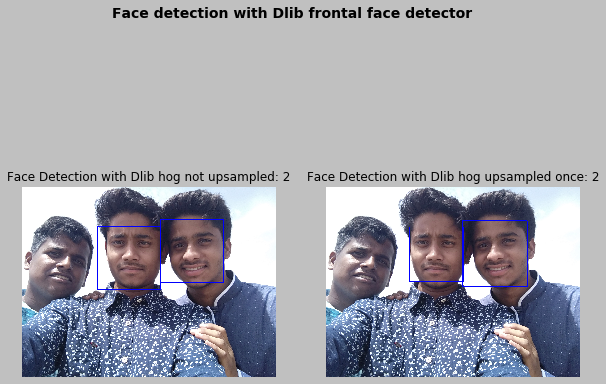

In [11]:
##Initializing the HOG face detector
detector = dlib.get_frontal_face_detector()

##Loading the image
img = cv2.imread('faces.jpg')

##Converting image to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

##Detecting faces
rects = detector(gray,0)

##Upsampling 1 time and detecting
rects1 = detector(gray,1)

##Drawing rectangle on detected faces
faces1 = show_detection(img.copy(),rects)
faces2 = show_detection(img.copy(),rects1)

##Showing the detected faces
fig = plt.figure(figsize=(10,8))
plt.suptitle('Face detection with Dlib frontal face detector', fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')
show_with_matplotlib(faces1,'Face Detection with Dlib hog not upsampled: '+str(len(rects)),1)
show_with_matplotlib(faces2,'Face Detection with Dlib hog upsampled once: '+str(len(rects1)),2)
plt.show()

## Face Detection in video

In [3]:
##Initializing the HOG face detector
face_detector = dlib.get_frontal_face_detector()

##Loading the video file
cam = cv2.VideoCapture('video.mp4') ## enter 0 to detect faces using webcam
cam.set(3,640) # set Width
cam.set(4,480) # set Height

while True:
    
    ret,frame = cam.read()
    
    if not ret:
        break
        
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    rects = face_detector(gray,1)
    
    faces = show_detection_video(frame.copy(),rects)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cam.release()
cv2.destroyAllWindows()

In [2]:
##function to draw rectangle over detected faces
def show_detection_video(image,faces):
    for face in faces:
        cv2.rectangle(image,(face.left(),face.top()),(face.right(),face.bottom()),(255,0,0),5)
    cv2.imshow('Frame',image)